# Chapter 1 - Understanding Deep Learning Anomaly Detection

[PyOD](https://github.com/yzhao062/pyod), is an open-source Python library that provides over 40 outlier detection algorithms, covering from outlier ensembles to neural network-based methods on multivariate data under a unified API. This notebook covers a **point anomaly** example using PyOD and a [diabetes dataset available at Kaggle](https://www.kaggle.com/datasets/mathchi/diabetes-data-set). 

You can experiment with this example on [Amazon SageMaker Studio Lab](https://aws.amazon.com/sagemaker/studio-lab/), a free ML development environment that provides up to 12 hours of CPU or 4 hours of GPU per user session and 15GiB storage at no cost. Alternatively, you can try this on your preferred Integrated Development Environment (IDE).

## Setup

Install and load essential libraries

In [2]:
# Install required libraries

import sys
!{sys.executable} -m pip install -r requirements.txt


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import warnings
from pyod.models.knn import KNN
from platform import python_version

warnings.filterwarnings('ignore')

print(f'Python version: {python_version()}')

Python version: 3.10.8


## Load the Dataset

The [dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) contains the following features:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 is not diabetic or 1 is diabetic)

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Generate descriptive statistics about the dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We will focus on identifying outliers using the Glucose and Insulin features for this example.

In [6]:
# Assign model feature and target column to variables

X = df['Glucose']
Y = df['Insulin']

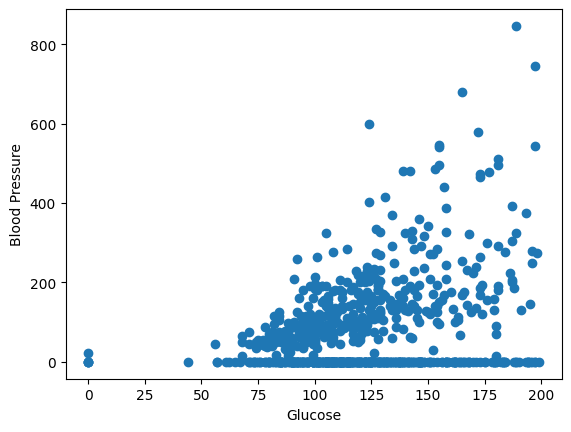

In [7]:
# Visualize a scatter plot

import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.show()

## Train a Model

We will reshape the data into the desired input format for KNN() model, build a KNN model, and fit it with the target feature. Then, the KNN model is ready to make prediction for outliers.

In [8]:
from pyod.models.knn import KNN

Y = Y.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)
clf = KNN()
clf.fit(Y)
outliers = clf.predict(Y)

## Identify Outliers

The outliers variable contains values for prediction indicating 1 is an outlier and 0 is not an outlier. Let's find the position of identified outliers.

In [9]:
anomaly = np.where(outliers==1)

# List of identified outliers
anomaly

(array([  8,  13,  20,  31,  43,  52,  53,  54,  56,  73,  99, 111, 132,
        144, 153, 162, 182, 186, 199, 206, 220, 228, 231, 247, 248, 254,
        258, 286, 287, 296, 297, 323, 335, 359, 364, 370, 388, 392, 409,
        412, 415, 458, 485, 486, 487, 540, 545, 555, 574, 584, 606, 645,
        655, 673, 679, 695, 707, 710, 713, 715, 753]),)

In [10]:
# Preview identified outliers 

df.iloc[anomaly].head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
20,3,126,88,41,235,39.3,0.704,27,0
31,3,158,76,36,245,31.6,0.851,28,1
43,9,171,110,24,240,45.4,0.721,54,1
52,5,88,66,21,23,24.4,0.342,30,0
53,8,176,90,34,300,33.7,0.467,58,1
54,7,150,66,42,342,34.7,0.718,42,0
56,7,187,68,39,304,37.7,0.254,41,1
73,4,129,86,20,270,35.1,0.231,23,0


## Visualize Outlier Distribution

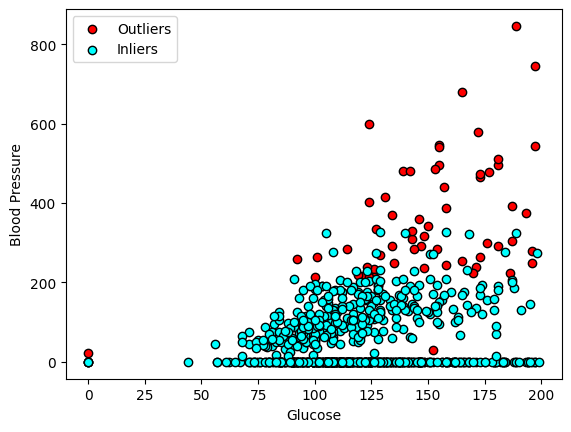

In [11]:
# Visualize outlier distribution

Y_outliers = Y[np.where(outliers==1)]
X_outliers = X[np.where(outliers==1)]
Y_inliers = Y[np.where(outliers==0)]
X_inliers = X[np.where(outliers==0)]

plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label= 'Outliers')
plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='cyan', label= 'Inliers')
plt.legend()
plt.ylabel('Blood Pressure')
plt.xlabel('Glucose')
plt.show()

## Calculate Anomaly Scores

PyOD predicts anomaly score for the outliers using the trained model. The larger the anomaly score, the higher probability the instance is an outlier.

In [12]:
# Calculate anomaly scores

anomaly_score = clf.decision_function(Y)

Visualize outlier distribution using a histogram. The red vertical line indicates the minimum anomaly score to flag an instance as an outlier.

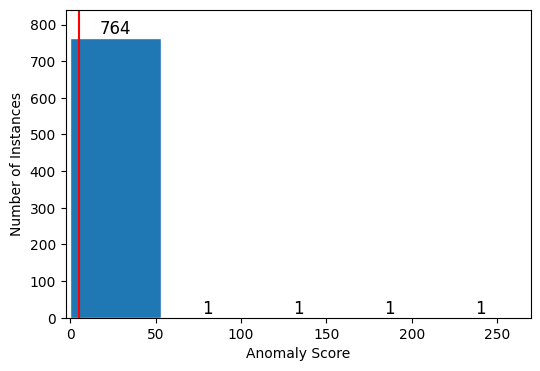

In [13]:
n_bins = 5

min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(outliers==1)])*10)/10

plt.figure(figsize=(6, 4))
values, bins, bars = plt.hist(anomaly_score, bins=n_bins, edgecolor='white')
plt.axvline(min_outlier_anomaly_score, c='r')
plt.bar_label(bars, fontsize=12)
plt.margins(x=0.01, y=0.1)
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Instances')
plt.show()

## Change Anomaly Threshold

You can manually define a threshold for anomaly score.

In [14]:
# Set a higher threshold of anomaly score

raw_outliers = np.where(anomaly_score >= 250)
raw_outliers

(array([13]),)

In [15]:
# View the identified outlier

df.iloc[raw_outliers].head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1


Visualize the distribution with a modified anomaly score threshold.

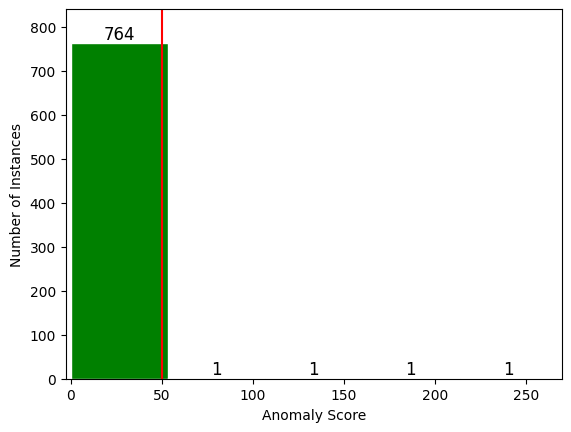

In [16]:
n_bins = 5

min_anomaly_score = 50

values, bins, bars = plt.hist(anomaly_score, bins=n_bins, edgecolor='white', color='green')
plt.axvline(min_anomaly_score, c='r')
plt.bar_label(bars, fontsize=12)
plt.margins(x=0.01, y=0.1)
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Instances')
plt.show()

This concludes a walkthrough of point anomaly detection using PyOD. You can explore other [outlier detection models provided by PyOD](https://pyod.readthedocs.io/en/latest/pyod.models.html#). 